# Reducción no lineal de dimensión: Análisis de la Componente Principal por Núcleos (KPCA)

Muchas veces tendremos conjuntos de datos que no se pueden separa linealmente dentro de la propia dimensionalidad, la idea del KPCA es llevarlo a una dimension más alta.

Aplicar una transformación no lineal. Ejemplo cuando vimos lo de redes neuronales [playground.tensorflow](https://playground.tensorflow.org/), que agregabamos unas caracteristicas cudrados, senos, multiplicaciones,etc, esas son concidas como funciones de kernel.

Al aplicar una transformacion no lineal, lo llevamos a un dimension más arriba, y es probable de esa dimension si se puedan separar los conjuntos linealmente.

Esa es la idea intuitica de KPCA.

- Primero aplicamos una función de kernel.

- Lo llevamos a una dimension superior.

- Despues aplicamos PCA en esa dimensión superior.

keyword: Hiperparametro

## Implementacion de RBF Kernel PCA

In [1]:
#KPCA con RBF como kernel
import scipy
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def rbf_kpca(X, gamma, n_components):
    """
    Kernel RBF
    
    Arguments:
    X -- El conjunto de caracteristicas.
    gamma -- Valor de gamma
    n_components -- NUmero de componentes que obtendremos al fina.
    """
    
    sq_dists = pdist(X,'sqeuclidean') # distancias cuadraticas
    mat_sq_dists = squareform(sq_dists) # matriz de distancias
    K = np.exp(-gamma * mat_sq_dists)
    # Centrar
    N = K.shape[0] 
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    eigen_vals, eigen_vecs = eigh(K)
    eigen_vals, eigen_vecs = eigen_vals[::-1], eigen_vecs[:,::-1]
    
    print(eigen_vals.shape, ' : ', eigen_vecs.shape)
    
    # Selecciona los k primeros
    alphas = np.column_stack([eigen_vecs[:, i] for i in range(n_components)])
    lambdas = np.column_stack([eigen_vals[i] for i in range(n_components)])
    
    return alphas,lambdas

### Obtencion de datos

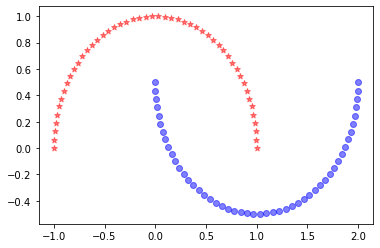

In [7]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, random_state=123)


plt.scatter(X[y==0,0], X[y==0,1], color='red', marker='*',
           alpha=0.5)

plt.scatter(X[y==1,0], X[y==1,1], color='blue', marker='o',
           alpha=0.5)

plt.show()

Dos medias lunas, esos son nuestro conjuntos, no existe una separación lineal, no hay ninguna linea que vaya a separar esos dos conjuntos.

Vamos a preguntarnos si PCA puede hacer algo.

### Estandarización

Vemos en la grafica que no hay un sesgo en los valores, tambien debido a que es un conjunto fictio.

### Reducción PCA


In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

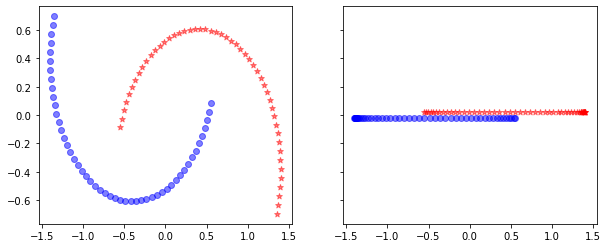

In [20]:
# Haremos subgraficas, una delante de la otra
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharey=True)
ax[0].scatter(X_pca[y==0,0], X_pca[y==0,1], color='red', marker='*',
           alpha=0.5)

ax[0].scatter(X_pca[y==1,0], X_pca[y==1,1], color='blue', marker='o',
           alpha=0.5)

# Mandaremos el resultado de PCA a la derecha, para ver si
# se separa a nuestros conjuntos.
ax[1].scatter(X_pca[y==0,0], np.zeros((50,1))+0.02, color='red', marker='*',
           alpha=0.5)

ax[1].scatter(X_pca[y==1,0], np.zeros((50,1))-0.02, color='blue', marker='o',
           alpha=0.5)

Este es el resultado, por lo tanto PCA no puede separar estos conjuntos.

Esto es debido porque los conjuntos no son linealmente separables.

## Usaremos KPCA

Esto lo llevara a un dimension de dos por dos y depues lo vamos a regresar a solo dos.

(100,)  :  (100, 100)


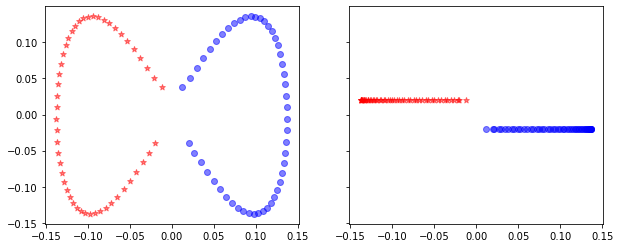

In [31]:
X_kpca, l = rbf_kpca(X, gamma=15, n_components=2)

# Haremos subgraficas, una delante de la otra
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharey=True)
ax[0].scatter(X_kpca[y==0,0], X_kpca[y==0,1], color='red', marker='*',
           alpha=0.5)

ax[0].scatter(X_kpca[y==1,0], X_kpca[y==1,1], color='blue', marker='o',
           alpha=0.5)

# Mandaremos el resultado de PCA a la derecha, para ver si
# se separa a nuestros conjuntos.
ax[1].scatter(X_kpca[y==0,0], np.zeros((50,1))+0.02, color='red', marker='*',
           alpha=0.5)

ax[1].scatter(X_kpca[y==1,0], np.zeros((50,1))-0.02, color='blue', marker='o',
           alpha=0.5)

Lo que acabamos de hacer es pasar nuestro conjunto de `X` que eran las medias lunas por nuestra función del kernel, lo llevamos a una matriz de $2x2$ con gamma=$15$ y con eso, despues obtener las dos principales, nos devuelve estos conjuntos como mariposas, y los volvemos a proyectar en la parte derecha en el entorno de $y=0$ y vemos que si no los manda muy cerca de zero y que son perfectamente separables.

Por lo tanto, con KPCA los separa bastante bien.

Podemos jugar cone esa _gamma_ para ver si los separa bien:

(100,)  :  (100, 100)


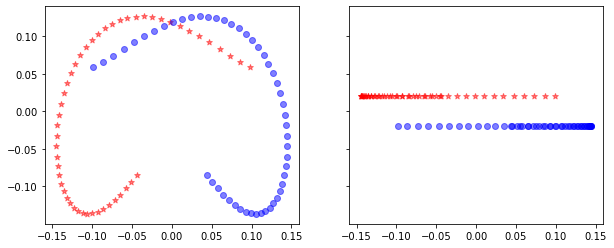

In [32]:
X_kpca, l = rbf_kpca(X, gamma=3, n_components=2)

# Haremos subgraficas, una delante de la otra
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharey=True)
ax[0].scatter(X_kpca[y==0,0], X_kpca[y==0,1], color='red', marker='*',
           alpha=0.5)

ax[0].scatter(X_kpca[y==1,0], X_kpca[y==1,1], color='blue', marker='o',
           alpha=0.5)

# Mandaremos el resultado de PCA a la derecha, para ver si
# se separa a nuestros conjuntos.
ax[1].scatter(X_kpca[y==0,0], np.zeros((50,1))+0.02, color='red', marker='*',
           alpha=0.5)

ax[1].scatter(X_kpca[y==1,0], np.zeros((50,1))-0.02, color='blue', marker='o',
           alpha=0.5)

Eso se le conoce como ajuste de hiperparametro.

La gamma es un _hiperparametro_ para la separacion de conjuntos.

La idea basica es jugar  con ese hiperparametro hasta encontrar el valor que los separa adeucademente.


## KPCA con sckit-learn

In [33]:
from sklearn.decomposition import KernelPCA

# Le tenememos que indicar que kernel
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)

Un ejercicio moral, es ir probando con diferentes kernel (kernel polinomial y el kernel tangente hiperbólico) y ver si sí los separa los datos, ir jugando con la gamma, en el caso de los demas kernel puede haber otros hiperparametros, ver que sucede.

### Visualizando

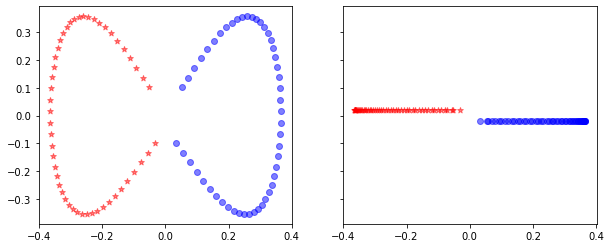

In [34]:
# Haremos subgraficas, una delante de la otra
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharey=True)
ax[0].scatter(X_kpca[y==0,0], X_kpca[y==0,1], color='red', marker='*',
           alpha=0.5)

ax[0].scatter(X_kpca[y==1,0], X_kpca[y==1,1], color='blue', marker='o',
           alpha=0.5)

# Mandaremos el resultado de PCA a la derecha, para ver si
# se separa a nuestros conjuntos.
ax[1].scatter(X_kpca[y==0,0], np.zeros((50,1))+0.02, color='red', marker='*',
           alpha=0.5)

ax[1].scatter(X_kpca[y==1,0], np.zeros((50,1))-0.02, color='blue', marker='o',
           alpha=0.5)

Vemos que es casi exactametne igual, pero tiene algunas sutilezas en los ejes, pero los conjuntos si los separa bien, a comparación con PCA simple.



## Ejemplo 2

Existe otro conjunto, donde los datos se ven como circulos concentricos, el cual con kernel PCA si lo puede separar.

In [36]:
# Tarea moral, aplicar lo mismo que hicimos con medias lunas
# pero ahora con el conjunto de datos que forman circulos concentricos

# Hint: Debemos jugar con la gamma